Overlays and Binary Images

Blending

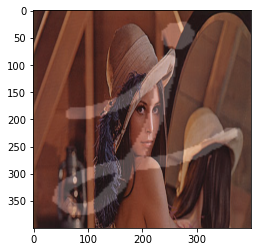

In [2]:
import cv2
import imutils
import matplotlib.pyplot as plt
import numpy as np

alpha = 0.5

image1 = cv2.imread('lena.jpg')
image2 = cv2.imread('j.png')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

resized1 = cv2.resize(image1, (400,400))
resized2 = cv2.resize(image2, (400,400))

added_image = cv2.addWeighted(resized1,0.7,resized2,0.2,0)

plt.imshow(added_image)




Rotation demo


In [5]:
import cv2
import imutils
import matplotlib.pyplot as plt
import numpy as np

# load the image from disk

image = cv2.imread('lena.jpg')
# loop over the rotation angles
for angle in np.arange(0, 360, 15):
	rotated = imutils.rotate(image, angle)
	cv2.imshow("Rotated (Problematic)", rotated)
	cv2.waitKey(0)
# loop over the rotation angles again, this time ensuring
# no part of the image is cut off
for angle in np.arange(0, 360, 15):
    rotated = imutils.rotate_bound(image, angle)
    print(rotated.shape)
    cv2.imshow("Rotated (Correct)", rotated)
    cv2.waitKey(0)


(225, 400, 3)
(320, 444, 3)
(394, 458, 3)
(441, 441, 3)
(458, 394, 3)
(444, 320, 3)
(400, 225, 3)
(444, 320, 3)
(458, 394, 3)
(441, 441, 3)
(394, 458, 3)
(320, 444, 3)
(225, 400, 3)
(320, 444, 3)
(394, 458, 3)
(441, 441, 3)
(458, 394, 3)
(444, 320, 3)
(400, 225, 3)
(444, 320, 3)
(458, 394, 3)
(441, 441, 3)
(394, 458, 3)
(320, 444, 3)


Resizing


:: It prints every yth element from the list / array

a = [1,2,3,4,5,6,7,8,9]
a[::3]
[1, 4, 7]
The additional syntax of a[x::y] means get every yth element starting at position x

a[2::3]
[3, 6, 9]

(400, 200)
(200, 400)


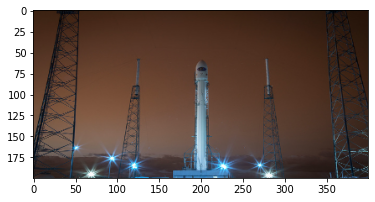

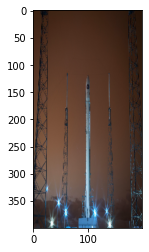

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


src = cv2.imread('rocket.jpg')

tall = np.zeros((400,200), dtype=np.uint8)
print(tall.shape)
print(tall.shape[1::-1])

tallimage = cv2.resize(src, tall.shape)
longimage = cv2.resize(src, tall.shape[1::-1])

plt.imshow(tallimage)
plt.show()

plt.imshow(longimage)
plt.show()

Binary thresholding

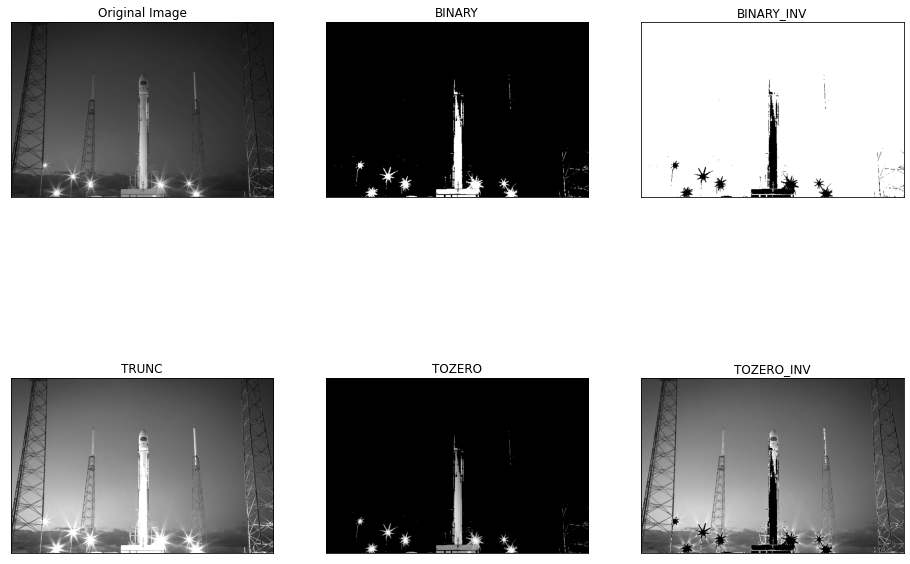

In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('rocket.jpg',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(16,12))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

Adaptive Thresholding

In the previous section, we used a global value as threshold value. But it may not be good in all the conditions where image has different lighting conditions in different areas. In that case, we go for adaptive thresholding. In this, the algorithm calculate the threshold for a small regions of the image. So we get different thresholds for different regions of the same image and it gives us better results for images with varying illumination.

It has three ‘special’ input params and only one output argument.

Adaptive Method - It decides how thresholding value is calculated.
cv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area.
cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.
Block Size - It decides the size of neighbourhood area.

C - It is just a constant which is subtracted from the mean or weighted mean calculated.

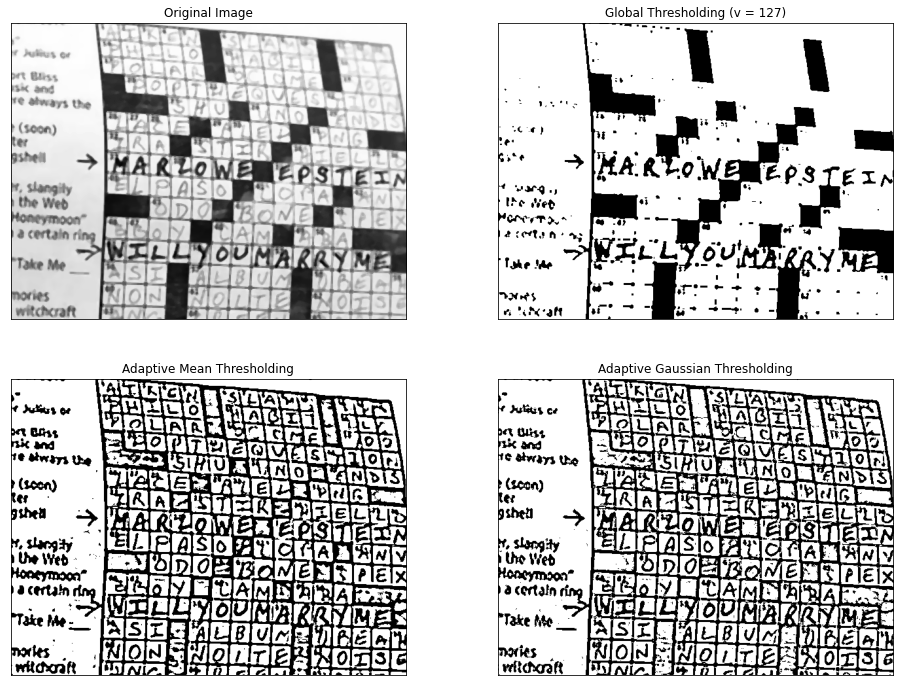

In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#img = cv2.imread('rocket.jpg',0)
img = cv2.imread('creative-proposal.jpg',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

plt.figure(figsize=(16,12))
for i in range(4):

    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Morphology Example 1 -Opening

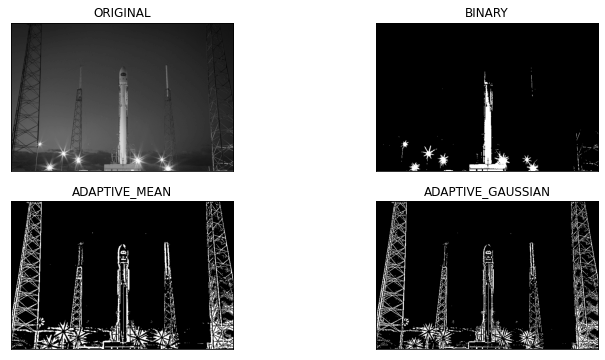

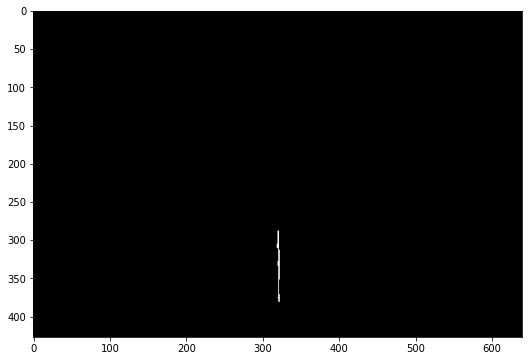

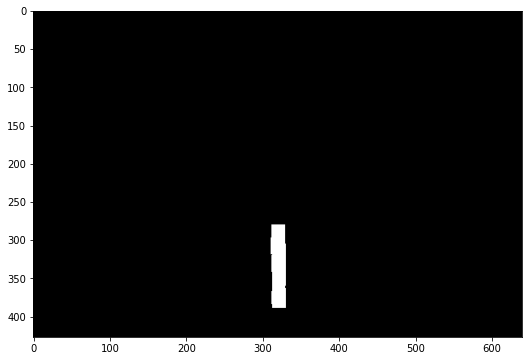

In [10]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('rocket.jpg',0)

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

thresh2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,11, 5)
thresh3 =cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 5)
plt.figure(figsize= (12, 6))
images = [img, thresh1, thresh2, thresh3]
titles = ['ORIGINAL','BINARY','ADAPTIVE_MEAN','ADAPTIVE_GAUSSIAN']
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

SE = np.ones((9,9), np.uint8)
erosion = cv2.erode(thresh1, SE, iterations=2)
plt.figure(figsize= (12, 6))
plt.imshow(erosion, cmap='gray')
plt.show()

dilated = cv2.dilate(erosion, SE, iterations=2)
plt.figure(figsize= (12, 6))
plt.imshow(dilated, cmap='gray')
plt.show()

Morphology Example 2 -Opening

Text(0.5, 1.0, 'Dilate')

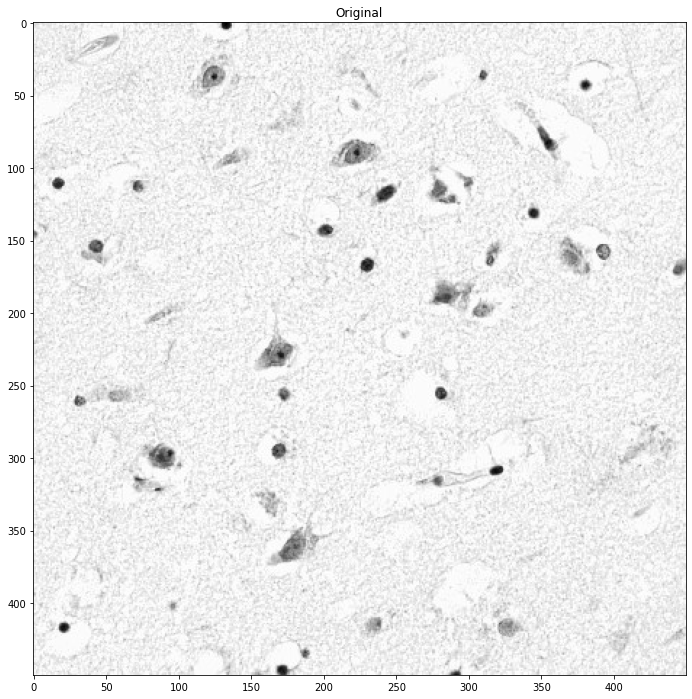

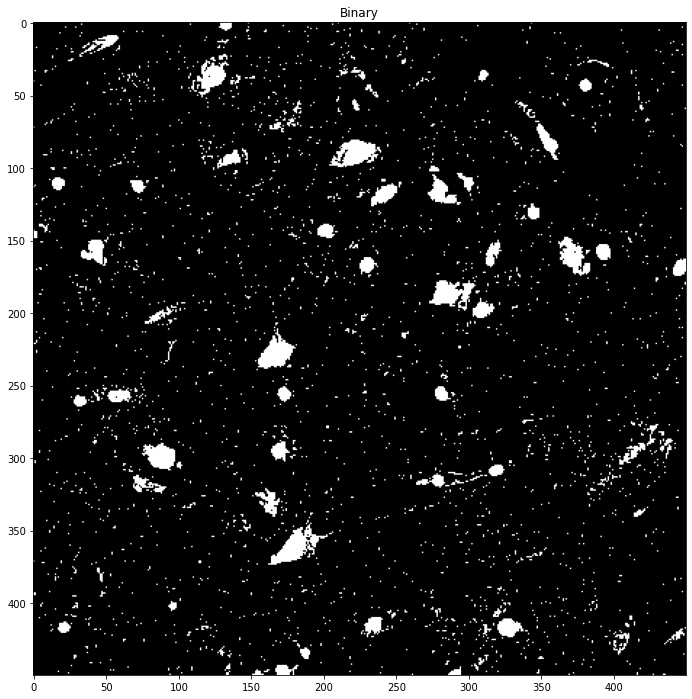

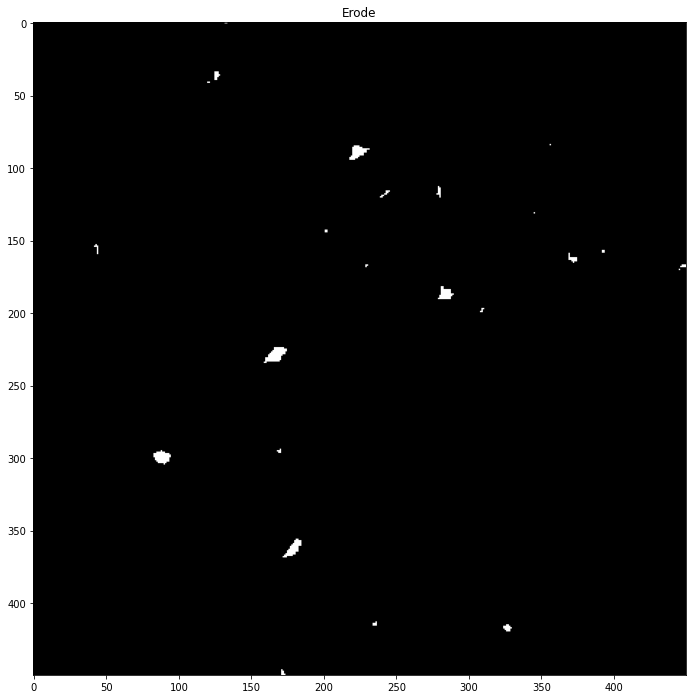

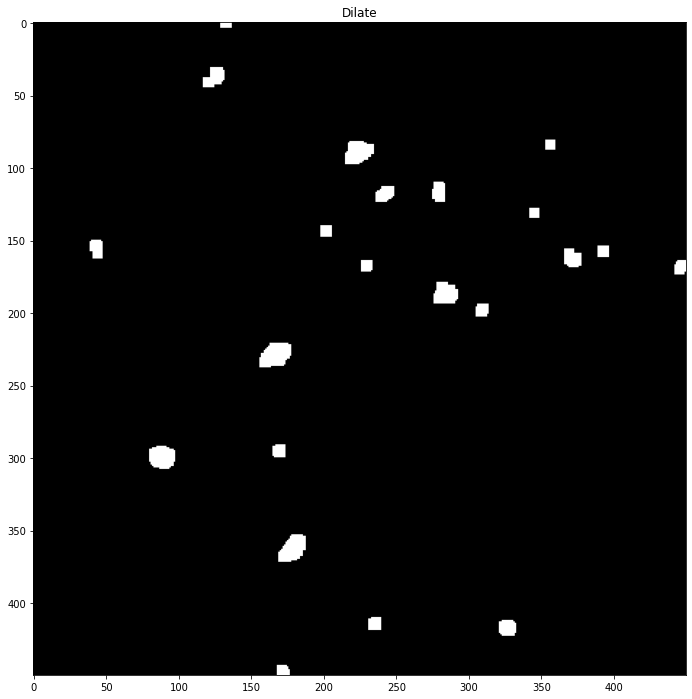

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


image = cv2.imread('cells.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


plt.figure(figsize=(16,12))
plt.imshow(image, cmap='gray')
plt.title('Original')

ret,imagebin= cv2.threshold(image ,210, 255,cv2.THRESH_BINARY_INV)

plt.figure(figsize=(16,12))
plt.imshow(imagebin, cmap='gray')
plt.title('Binary')

#Opening Erosion followed by dilation

kernel = np.ones((7,7),np.uint8)
erosion = cv2.erode(imagebin,kernel,iterations = 1)
plt.figure(figsize=(16,12))
plt.imshow(erosion, cmap='gray')
plt.title('Erode')

dilation = cv2.dilate(erosion,kernel,iterations = 1)
plt.figure(figsize=(16,12))
plt.imshow(dilation, cmap='gray')
plt.title('Dilate')

Morphology Example 3 - Opening and closing

Opening: Removes outside noise
Closing: Removes inside noise

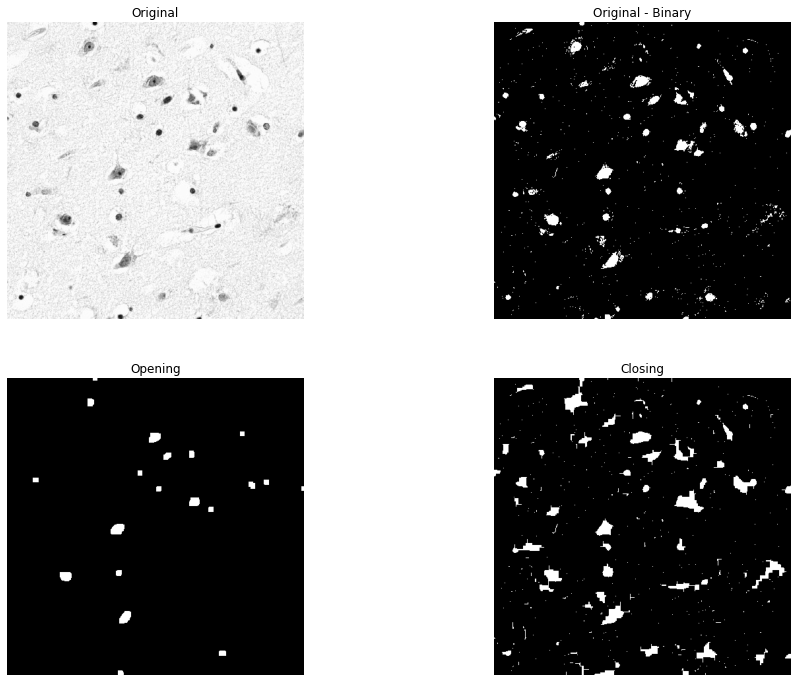

In [3]:
import cv2
import imutils
import matplotlib.pyplot as plt
import numpy as np

# load the image from disk as grayscale
image = cv2.imread('cells.jpg', 0)
ret,image1= cv2.threshold(image ,200, 255,cv2.THRESH_BINARY_INV)

kernel = np.ones((7,7),np.uint8)
opening = cv2.morphologyEx(image1, cv2.MORPH_OPEN, kernel)

kernel = np.ones((9,9),np.uint8)
closing = cv2.morphologyEx(image1, cv2.MORPH_CLOSE, kernel)



plt.figure(figsize=(16,12))
titles=['Original', 'Original - Binary', 'Opening', 'Closing']
images = [image, image1, opening, closing]

for count in range(4):
    plt.subplot(2,2,count+1)
    plt.imshow(images[count],cmap='gray')
    plt.title(titles[count])
    plt.axis('off')

plt.show()